In [238]:
using Printf
fix_e(x, dig = 6) = replace(string(round(x, sigdigits = dig)), r"e\+00" => "", r"e(-\d+)" => s" dot 10^(\1)", r"e\+?(\d+)" => s" dot 10^(\1)")

fix_e (generic function with 2 methods)

In [13]:
# Autor: Dawid Walczak

function experiment_1(T)
    x = [T(2.718281828), T(-3.141592654), T(1.414213562), T(0.577215664), T(0.301029995)]
    y = [T(1486.2497), T(878366.9879), T(-22.37492), T(4773714.647), T(0.000185049)]
    m = x .* y
    
    forward = m[1] + m[2] + m[3] + m[4] + m[5]
    backward = m[5] + m[4] + m[3] + m[2] + m[1]
    great_to_low = (m[4] + m[1] + m[5]) + (m[2] + m[3])
    low_to_great = (m[5] + m[1] + m[4]) + (m[3] + m[2])
    
    d = -1.00657107000000e-11
    
    println("m = $(m)")

    println("Dla $(T)")
    println("Do przodu $(forward) błąd $(abs(forward - d)/abs(d))")
    println("Do tyłu $(backward) błąd $(abs(backward - d)/abs(d))")
    println("Najw do najmn $(great_to_low) błąd $(abs(great_to_low - d)/abs(d))")
    println("Najmn do najw $(low_to_great) błąd $(abs(low_to_great - d)/abs(d))")
    println("Prawdziwy $(d)")

    println("[Do przodu], \$$(forward)\$, \$$(abs(forward - d)/abs(d))\$,")
    println("[W tył], \$$(backward)\$, \$$(abs(backward - d)/abs(d))\$,")
    println("[Od max do min], \$$(great_to_low)\$, \$$(abs(great_to_low - d)/abs(d))\$,")
    println("[Od min do max], \$$(low_to_great)\$, \$$(abs(low_to_great - d)/abs(d))\$,")
end

experiment(Float32)
experiment(Float64)

m = Float32[4040.0457, -2.7594715f6, -31.642914, 2.7554628f6, 5.5705295f-5]
Dla Float32
Do przodu -0.4999443 błąd 4.9668057661282845e10
Do tyłu -0.4543457 błąd 4.51379655800096e10
Najw do najmn -0.5 błąd 4.967359135306107e10
Najmn do najw -0.5 błąd 4.967359135306107e10
Prawdziwy -1.00657107e-11
[Do przodu], $-0.4999443$, $4.9668057661282845e10$,
[W tył], $-0.4543457$, $4.51379655800096e10$,
[Od max do min], $-0.5$, $4.967359135306107e10$,
[Od min do max], $-0.5$, $4.967359135306107e10$,
m = [4040.045551380452, -2.7594712767027467e6, -31.64291531266504, 2.755462869714631e6, 5.5705299544755004e-5]
Dla Float64
Do przodu -0.004296342739891585 błąd 4.2682954615672344e8
Do tyłu -0.004296342998713953 błąd 4.2682957186999655e8
Najw do najmn -0.004296342842280865 błąd 4.268295563288099e8
Najmn do najw -0.004296342842280865 błąd 4.268295563288099e8
Prawdziwy -1.00657107e-11
[Do przodu], $-0.004296342739891585$, $4.2682954615672344e8$,
[W tył], $-0.004296342998713953$, $4.2682957186999655e8$,
[Od

In [7]:
f(x) = ℯ^x * log(1 + ℯ^(-x))

f (generic function with 1 method)

In [12]:
using Plots

x = range(-10, 50, length=1000)
y = f.(x)

plot(x,y, legend=false)
savefig("e.svg")

"/home/dawiderter/Projects/Studies/scientific_computing/lista_2/e.svg"

In [255]:
function calc_err(A, n)
    x = ones(n)
    b = A * x

    x_g = A \ b
    x_gerr = norm(x_g - x)/norm(x)

    x_i = inv(A) * b
    x_ierr = norm(x_i - x)/norm(x)

    return (x_gerr, x_ierr)
end

calc_err (generic function with 1 method)

In [519]:
using LinearAlgebra
include("./hilb.jl")

hilb_x = []
hilb_g = []
hilb_r = []
hilb_c = []
hilb_i = []

for n in 2:50
    A = hilb(n)
    (gerr, ierr) = calc_err(A, n)
    println("Hilb($(n)), rank $(rank(A)), cond $(cond(A)) gerr $(gerr), inverr $(ierr)")
    
    push!(hilb_x, n)
    push!(hilb_g, gerr)
    push!(hilb_i, ierr)
    push!(hilb_r, rank(A))
    push!(hilb_c, cond(A))
end

Hilb(2), rank 2, cond 19.281470067903967 gerr 5.661048867003676e-16, inverr 1.1240151438116956e-15
Hilb(3), rank 3, cond 524.0567775860627 gerr 8.351061872731819e-15, inverr 9.825526038180824e-15
Hilb(4), rank 4, cond 15513.738738929662 gerr 4.2267316576255873e-13, inverr 3.9600008750140806e-13
Hilb(5), rank 5, cond 476607.2502419338 gerr 1.256825919192874e-12, inverr 8.128168770215688e-12
Hilb(6), rank 6, cond 1.495105864177819e7 gerr 1.5435074657413347e-10, inverr 1.0423794065751672e-10
Hilb(7), rank 7, cond 4.753673568766496e8 gerr 6.520804933066021e-9, inverr 4.3299229851434615e-9
Hilb(8), rank 8, cond 1.5257575563722723e10 gerr 3.6010489197068436e-7, inverr 4.0236799996435915e-7
Hilb(9), rank 9, cond 4.9315332284138226e11 gerr 1.3216991540025553e-5, inverr 1.4626798972086921e-5
Hilb(10), rank 10, cond 1.6024980732174455e13 gerr 0.0004194170177181955, inverr 0.00040714905218460087
Hilb(11), rank 10, cond 5.224780779168285e14 gerr 0.01004906783345069, inverr 0.010645959401385671
Hil

In [518]:
using Plots
using LaTeXStrings

scatter(hilb_x, [hilb_g hilb_i], labels= [raw"Błąd H / b" "Błąd inv(H) * b"], 
    yscale=:log10,  
    shape = :circle,
    xlabel = "Rozmiar macierzy H",
    yticks = [1e-15,1e-10,1e-5,1,1e1,1e2,1e3,1e4],
    ms = 4, msw = 0,
    legend_position = :bottomright)

savefig("hilb.svg")

"/home/dawiderter/Projects/Studies/scientific_computing/lista_2/hilb.svg"

In [520]:
for i in 1:length(hilb_x)
    println("\$$(hilb_x[i])\$, \$$(hilb_r[i])\$, \$$(fix_e(hilb_c[i]))\$, \$$(fix_e(hilb_g[i]))\$, \$$(fix_e(hilb_i[i]))\$,")
end


$2$, $2$, $19.2815$, $5.66105 dot 10^(-16)$, $1.12402 dot 10^(-15)$,
$3$, $3$, $524.057$, $8.35106 dot 10^(-15)$, $9.82553 dot 10^(-15)$,
$4$, $4$, $15513.7$, $4.22673 dot 10^(-13)$, $3.96 dot 10^(-13)$,
$5$, $5$, $476607.0$, $1.25683 dot 10^(-12)$, $8.12817 dot 10^(-12)$,
$6$, $6$, $1.49511 dot 10^(7)$, $1.54351 dot 10^(-10)$, $1.04238 dot 10^(-10)$,
$7$, $7$, $4.75367 dot 10^(8)$, $6.5208 dot 10^(-9)$, $4.32992 dot 10^(-9)$,
$8$, $8$, $1.52576 dot 10^(10)$, $3.60105 dot 10^(-7)$, $4.02368 dot 10^(-7)$,
$9$, $9$, $4.93153 dot 10^(11)$, $1.3217 dot 10^(-5)$, $1.46268 dot 10^(-5)$,
$10$, $10$, $1.6025 dot 10^(13)$, $0.000419417$, $0.000407149$,
$11$, $10$, $5.22478 dot 10^(14)$, $0.0100491$, $0.010646$,
$12$, $11$, $1.64259 dot 10^(16)$, $0.550211$, $0.669789$,
$13$, $11$, $4.49367 dot 10^(18)$, $70.1556$, $82.6668$,
$14$, $11$, $3.21984 dot 10^(17)$, $9.64964$, $10.0947$,
$15$, $12$, $3.36601 dot 10^(17)$, $692.43$, $715.741$,
$16$, $12$, $2.24994 dot 10^(18)$, $10.4147$, $8.44214$,
$1

In [485]:
include("./matcond.jl")

K = 1000

r_c = [1, 10, 1e3, 1e7, 1e12, 1e16]
N = [5,10,20]

r_g = [[] for _ in 1:length(N)]
r_i = [[] for _ in 1:length(N)]
r_r = [[] for _ in 1:length(N)]
r_mc = [[] for _ in 1:length(N)]


for (i, n) in zip(1:length(N), N)
    for c in r_c
        gerrsum = 0
        ierrsum = 0
        ranksum = 0
        condsum = 0
        for _ in 1:K
            A = matcond(n, c)
            while det(A) == 0
                A = matcond(n, c)
            end
            (gerr, ierr) = calc_err(A, n)
            gerrsum += gerr
            ierrsum += ierr
            ranksum += rank(A)
            condsum += cond(A)
        end
        gerr = gerrsum / K
        ierr = ierrsum / K
        m_rank = ranksum / K
        m_cond = condsum / K 
        println("R($(n), $(c)), rank $(m_rank), cond $(m_cond) gerr $(gerr), inverr $(ierr)")
        push!(r_g[i], gerr)
        push!(r_i[i], ierr)
        push!(r_r[i], m_rank)
        push!(r_mc[i], m_cond)
    end
end

R(5, 1.0), rank 5.0, cond 1.0000000000000002 gerr 1.725307348540715e-16, inverr 1.6942578611032268e-16
R(5, 10.0), rank 5.0, cond 10.0 gerr 2.5755422930049933e-16, inverr 2.6020598701897246e-16
R(5, 1000.0), rank 5.0, cond 1000.0000000000039 gerr 1.7883429408341592e-14, inverr 1.867578232990689e-14


R(5, 1.0e7), rank 5.0, cond 1.0000000000368917e7 gerr 1.8297772223728817e-10, inverr 1.9460423146413394e-10
R(5, 1.0e12), rank 5.0, cond 9.999990349195457e11 gerr 1.727399361947506e-5, inverr 1.815878842311406e-5
R(5, 1.0e16), rank 4.0, cond 7.218132865925134e16 gerr 0.20552414558757676, inverr 0.21442278924122693


R(10, 1.0), rank 10.0, cond 1.0000000000000002 gerr 2.767120048268435e-16, inverr 2.5241987482427974e-16
R(10, 10.0), rank 10.0, cond 10.0 gerr 3.466909127426319e-16, inverr 3.358928425515837e-16


R(10, 1000.0), rank 10.0, cond 1000.0000000000055 gerr 1.8997512073638403e-14, inverr 1.9435477812207907e-14
R(10, 1.0e7), rank 10.0, cond 1.000000000033156e7 gerr 1.7878402834455743e-10, inverr 1.8680320887935698e-10


R(10, 1.0e12), rank 10.0, cond 9.999996151068475e11 gerr 1.8277092377710893e-5, inverr 1.883606057073336e-5
R(10, 1.0e16), rank 9.0, cond 2.347874169399006e16 gerr 0.19738846813368002, inverr 0.20043864527266578


R(20, 1.0), rank 20.0, cond 1.0000000000000002 gerr 4.814509284111668e-16, inverr 4.051216297561335e-16


R(20, 10.0), rank 20.0, cond 10.0 gerr 5.103465172017205e-16, inverr 4.861066227071073e-16


R(20, 1000.0), rank 20.0, cond 999.9999999999983 gerr 1.900564489153455e-14, inverr 1.9396467762105066e-14


R(20, 1.0e7), rank 20.0, cond 9.999999999782346e6 gerr 1.9132125849290752e-10, inverr 1.956450974058836e-10


R(20, 1.0e12), rank 20.0, cond 1.0000033414753253e12 gerr 1.881813232133934e-5, inverr 1.9341367898233697e-5


R(20, 1.0e16), rank 19.0, cond 4.863522030017351e16 gerr 0.2129530735422485, inverr 0.2177706189028061


In [486]:
for i in 1:length(N)
    for j in 1:length(r_c)
        println("\$$(fix_e(r_c[j]))\$, \$$(Int(r_r[i][j]))\$, \$$(fix_e(r_mc[i][j]))\$, \$$(fix_e(r_g[i][j]))\$, \$$(fix_e(r_i[i][j]))\$,")
    end
    println()
end


$1.0$, $5$, $1.0$, $1.72531 dot 10^(-16)$, $1.69426 dot 10^(-16)$,
$10.0$, $5$, $10.0$, $2.57554 dot 10^(-16)$, $2.60206 dot 10^(-16)$,
$1000.0$, $5$, $1000.0$, $1.78834 dot 10^(-14)$, $1.86758 dot 10^(-14)$,
$1.0 dot 10^(7)$, $5$, $1.0 dot 10^(7)$, $1.82978 dot 10^(-10)$, $1.94604 dot 10^(-10)$,
$1.0 dot 10^(12)$, $5$, $9.99999 dot 10^(11)$, $1.7274 dot 10^(-5)$, $1.81588 dot 10^(-5)$,
$1.0 dot 10^(16)$, $4$, $7.21813 dot 10^(16)$, $0.205524$, $0.214423$,

$1.0$, $10$, $1.0$, $2.76712 dot 10^(-16)$, $2.5242 dot 10^(-16)$,
$10.0$, $10$, $10.0$, $3.46691 dot 10^(-16)$, $3.35893 dot 10^(-16)$,
$1000.0$, $10$, $1000.0$, $1.89975 dot 10^(-14)$, $1.94355 dot 10^(-14)$,
$1.0 dot 10^(7)$, $10$, $1.0 dot 10^(7)$, $1.78784 dot 10^(-10)$, $1.86803 dot 10^(-10)$,
$1.0 dot 10^(12)$, $10$, $1.0 dot 10^(12)$, $1.82771 dot 10^(-5)$, $1.88361 dot 10^(-5)$,
$1.0 dot 10^(16)$, $9$, $2.34787 dot 10^(16)$, $0.197388$, $0.200439$,

$1.0$, $20$, $1.0$, $4.81451 dot 10^(-16)$, $4.05122 dot 10^(-16)$,
$10.0$,

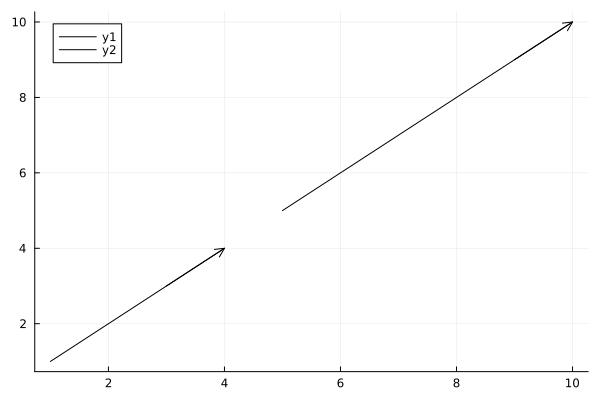

In [295]:
plt = plot([1:4, 5:10], [1:4, 5:10], arrow=:simple, color=:black)

In [534]:
using Polynomials

bad = reverse([1, -210.0, 20615.0,-1256850.0,
      53327946.0,-1672280820.0, 40171771630.0, -756111184500.0,          
      11310276995381.0, -135585182899530.0,
      1307535010540395.0,     -10142299865511450.0,
      63030812099294896.0,     -311333643161390640.0,
      1206647803780373360.0,     -3599979517947607200.0,
      8037811822645051776.0,      -12870931245150988800.0,
      13803759753640704000.0,      -8752948036761600000.0,
      2432902008176640000.0])

println(Polynomial(bad))

for x in bad
    @printf("%.20f\n", x)
end

2.4329e18 - 8.75295e18*x + 1.38038e19*x^2 - 1.28709e19*x^3 + 8.03781e18*x^4 - 3.59998e18*x^5 + 1.20665e18*x^6 - 3.11334e17*x^7 + 6.30308e16*x^8 - 1.01423e16*x^9 + 1.30754e15*x^10 - 1.35585e14*x^11 + 1.13103e13*x^12 - 7.56111e11*x^13 + 4.01718e10*x^14 - 1.67228e9*x^15 + 5.33279e7*x^16 - 1.25685e6*x^17 + 20615.0*x^18 - 210.0*x^19 + 1.0*x^20
2432902008176640000.00000000000000000000
-8752948036761600000.00000000000000000000
13803759753640704000.00000000000000000000
-12870931245150988288.00000000000000000000
8037811822645051392.00000000000000000000
-3599979517947607040.00000000000000000000
1206647803780373248.00000000000000000000
-311333643161390656.00000000000000000000
63030812099294896.00000000000000000000
-10142299865511450.00000000000000000000
1307535010540395.00000000000000000000
-135585182899530.00000000000000000000
11310276995381.00000000000000000000
-756111184500.00000000000000000000
40171771630.00000000000000000000
-1672280820.00000000000000000000
53327946.00000000000000000000
-125

In [539]:
b = Polynomial(bad)

g(x) = (x-1)*(x-2)*(x-3)*(x-4)*(x-5)*(x-6)*(x-7)*(x-8)*(x-9)*(x-10)*(x-11)*(x-12)*(x-13)*(x-14)*(x-15)*(x-16)*(x-17)*(x-18)*(x-19)*(x-20)

# for i in 1:20
#     println("root $(i), b(x) = $(b(i)), g(x) = $(g(i))")
# end

r = roots(b)

for i in 1:20
    #println("root $(abs(r[i])), b(x) = $(abs(b(r[i]))), g(x) = $(abs(g(r[i]))), err = $(abs(r[i] - i))")
    println("\$$(fix_e(r[i], 14))\$, \$$(fix_e(abs(b(r[i]))))\$, \$$(fix_e(abs(g(r[i]))))\$, \$$(fix_e(abs(r[i] - i)))\$,")
end


$0.9999999999997$, $35696.5$, $36626.4$, $3.01092 dot 10^(-13)$,
$2.0000000000283$, $176253.0$, $181304.0$, $2.83182 dot 10^(-11)$,
$2.9999999995921$, $279158.0$, $290172.0$, $4.07903 dot 10^(-10)$,
$3.9999999837375$, $3.02711 dot 10^(6)$, $2.04154 dot 10^(6)$, $1.62625 dot 10^(-8)$,
$5.0000006657698$, $2.29175 dot 10^(7)$, $2.08946 dot 10^(7)$, $6.6577 dot 10^(-7)$,
$5.9999892458248$, $1.29024 dot 10^(8)$, $1.12505 dot 10^(8)$, $1.07542 dot 10^(-5)$,
$7.000102002793$, $4.80511 dot 10^(8)$, $4.57291 dot 10^(8)$, $0.000102003$,
$7.9993558296078$, $1.63795 dot 10^(9)$, $1.55565 dot 10^(9)$, $0.00064417$,
$9.0029152943621$, $4.87707 dot 10^(9)$, $4.68782 dot 10^(9)$, $0.00291529$,
$9.9904130424817$, $1.36386 dot 10^(10)$, $1.26346 dot 10^(10)$, $0.00958696$,
$11.025022932909$, $3.58563 dot 10^(10)$, $3.30013 dot 10^(10)$, $0.0250229$,
$11.953283253847$, $7.53333 dot 10^(10)$, $7.38853 dot 10^(10)$, $0.0467167$,
$13.074314032447$, $1.9606 dot 10^(11)$, $1.84762 dot 10^(11)$, $0.074314$,
$1

In [540]:
bad_d = reverse([1, -210.0 - 2^(-23), 20615.0,-1256850.0,
      53327946.0,-1672280820.0, 40171771630.0, -756111184500.0,          
      11310276995381.0, -135585182899530.0,
      1307535010540395.0,     -10142299865511450.0,
      63030812099294896.0,     -311333643161390640.0,
      1206647803780373360.0,     -3599979517947607200.0,
      8037811822645051776.0,      -12870931245150988800.0,
      13803759753640704000.0,      -8752948036761600000.0,
      2432902008176640000.0])

21-element Vector{Float64}:
     2.43290200817664e18
    -8.7529480367616e18
     1.3803759753640704e19
    -1.2870931245150988e19
     8.037811822645051e18
    -3.599979517947607e18
     1.2066478037803732e18
    -3.1133364316139066e17
     6.30308120992949e16
    -1.014229986551145e16
     ⋮
     1.1310276995381e13
    -7.561111845e11
     4.017177163e10
    -1.67228082e9
     5.3327946e7
    -1.25685e6
 20615.0
  -210.0000001192093
     1.0

In [547]:
b = Polynomial(bad_d)

r = roots(b)

# for i in 1:20
#     println("root $(r[i]), b(x) = $(abs(b(r[i]))), g(x) = $(abs(g(r[i]))), err = $(abs(r[i] - i))")
# end

for i in 1:20
    println("\$$(fix_e(r[i], 14))\$, \$$(fix_e(abs(b(r[i]))))\$, \$$(fix_e(abs(g(r[i]))))\$, \$$(fix_e(abs(r[i] - i)))\$,")
end

$0.99999999999984 + 0.0im$, $20259.9$, $19987.9$, $1.64313 dot 10^(-13)$,
$2.000000000055 + 0.0im$, $346541.0$, $352369.0$, $5.50373 dot 10^(-11)$,
$2.9999999966034 + 0.0im$, $2.25806 dot 10^(6)$, $2.41624 dot 10^(6)$, $3.39658 dot 10^(-9)$,
$4.0000000897244 + 0.0im$, $1.05426 dot 10^(7)$, $1.12637 dot 10^(7)$, $8.97244 dot 10^(-8)$,
$4.9999985738879 + 0.0im$, $3.75783 dot 10^(7)$, $4.47574 dot 10^(7)$, $1.42611 dot 10^(-6)$,
$6.000020476673 + 0.0im$, $1.31409 dot 10^(8)$, $2.1421 dot 10^(8)$, $2.04767 dot 10^(-5)$,
$6.9996020704224 + 0.0im$, $3.93936 dot 10^(8)$, $1.78462 dot 10^(9)$, $0.00039793$,
$8.0077720290994 + 0.0im$, $1.18499 dot 10^(9)$, $1.8687 dot 10^(10)$, $0.00777203$,
$8.9158163679326 + 0.0im$, $2.22552 dot 10^(9)$, $1.37463 dot 10^(11)$, $0.0841836$,
$10.095455630536 - 0.64493282362407im$, $1.06779 dot 10^(10)$, $1.49007 dot 10^(12)$, $0.651959$,
$10.095455630536 + 0.64493282362407im$, $1.06779 dot 10^(10)$, $1.49007 dot 10^(12)$, $1.11092$,
$11.793890586174 - 1.6524771

In [564]:
function p_exp(p_0, r, n)
    p_next(p_n) = p_n + r*p_n*(1-p_n)

    p = p_0
    res = [p]
    for i in 1:n
        p = p_next(p)
        push!(res, p)
    end
    return res
end

function p_exp32(p_0, r, n)
    p_0 = Float32(p_0)
    r = Float32(r)
    p_next(p_n) = p_n + r*p_n*(Float32(1)-p_n)

    p = p_0
    res = [p]
    for i in 1:n
        p = p_next(p)
        push!(res, p)
    end
    return res
end

function p_exp32_nudged(p_0, r, n)
    p_0 = Float32(p_0)
    r = Float32(r)
    p_next(p_n) = p_n + r*p_n*(Float32(1)-p_n)

    p = p_0
    res = [p]
    for i in 1:9
        p = p_next(p)
        push!(res, p)
    end
    p = p_next(p)
    p = trunc(p, digits=3)
    push!(res, p)
    for i in 1:(n-10)
        p = p_next(p)
        push!(res, p)
    end
    return res
end

p_exp32_nudged (generic function with 1 method)

In [567]:
r = p_exp(0.01, 3, 40)
r_n = p_exp32_nudged(0.01, 3, 40)
r_32 = p_exp32(0.01, 3, 40)

for i in 0:40
    println("\$$(i)\$, \$$(fix_e(r[i + 1], 12))\$, \$$(fix_e(r_n[i + 1], 12))\$, \$$(fix_e(r_32[i + 1], 12))\$, [],")
end

$0$, $0.01$, $0.01$, $0.01$, [],
$1$, $0.0397$, $0.0397$, $0.0397$, [],
$2$, $0.15407173$, $0.15407173$, $0.15407173$, [],
$3$, $0.545072626044$, $0.5450726$, $0.5450726$, [],
$4$, $1.28897800119$, $1.2889781$, $1.2889781$, [],
$5$, $0.171519142109$, $0.1715188$, $0.1715188$, [],
$6$, $0.597820120107$, $0.5978191$, $0.5978191$, [],
$7$, $1.31911379241$, $1.3191134$, $1.3191134$, [],
$8$, $0.0562715776463$, $0.056273222$, $0.056273222$, [],
$9$, $0.215586839233$, $0.21559286$, $0.21559286$, [],
$10$, $0.72291430118$, $0.722$, $0.7229306$, [],
$11$, $1.32384194417$, $1.3241479$, $1.3238364$, [],
$12$, $0.0376952972547$, $0.036488414$, $0.037716985$, [],
$13$, $0.146518382714$, $0.14195944$, $0.14660022$, [],
$14$, $0.521670621435$, $0.50738037$, $0.521926$, [],
$15$, $1.27026177394$, $1.2572169$, $1.2704837$, [],
$16$, $0.240352172778$, $0.28708452$, $0.2395482$, [],
$17$, $0.788101190235$, $0.9010855$, $0.7860428$, [],
$18$, $1.28909430279$, $1.1684768$, $1.2905813$, [],
$19$, $0.171084

In [566]:
plot(0:40, [r r_n r_32], 
    labels=["Float64" "Zaburzony" "Bez zaburzeń"], legend = :bottomleft,
    lw=1, alpha=0.5)

savefig("logic.svg")

"/home/dawiderter/Projects/Studies/scientific_computing/lista_2/logic.svg"

In [370]:
function x_exp(c, x_0, n)
    x_next(x_n) = x_n*x_n + c
    
    x = x_0
    res = [x]
    for i in 1:n
        x = x_next(x)
        push!(res, x)
    end 

    return res
end

x_exp (generic function with 1 method)

In [477]:
using Plots
using LaTeXStrings

function plot_iterative(c, x_0, range_start, range_end)
    x = range(range_start,range_end,100)
    y = x .* x .+ c
    plt = plot(x,[x y], legend = false, lw = 1.5, title = latexstring("c = $(c), x_0 = $(x_0)"), dpi=200)
    
    r = x_exp(c,x_0,40)
    
    arrow_style = arrow(:closed, :head)
    GR.setarrowsize(0.8)
    
    for i in 1:40
        plot!(plt, [r[i], r[i]], [r[i], r[i+1]], 
            color = :black, ls = :dash, arrow = arrow_style, lw = 0.3, shape = :circle, ms = 1.5)
        plot!(plt, [r[i], r[i+1]], [r[i+1], r[i+1]], 
            color = :black, ls = :dash, arrow = arrow_style, lw = 0.3, shape = :circle, ms = 1.5)
    end
    
    display(plt)
    savefig(plt, "plots/$(c)_$(x_0).svg")
    savefig(plt, "plots/$(c)_$(x_0).png")
end


plot_iterative (generic function with 1 method)

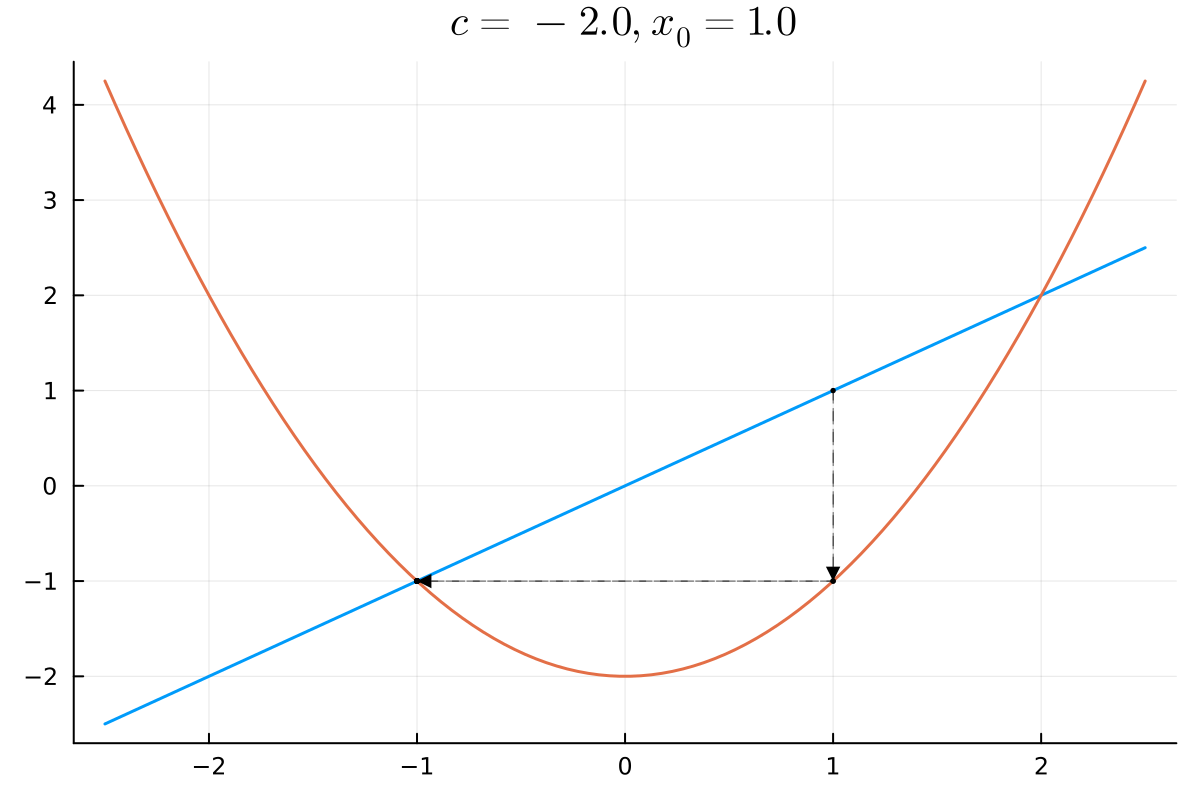

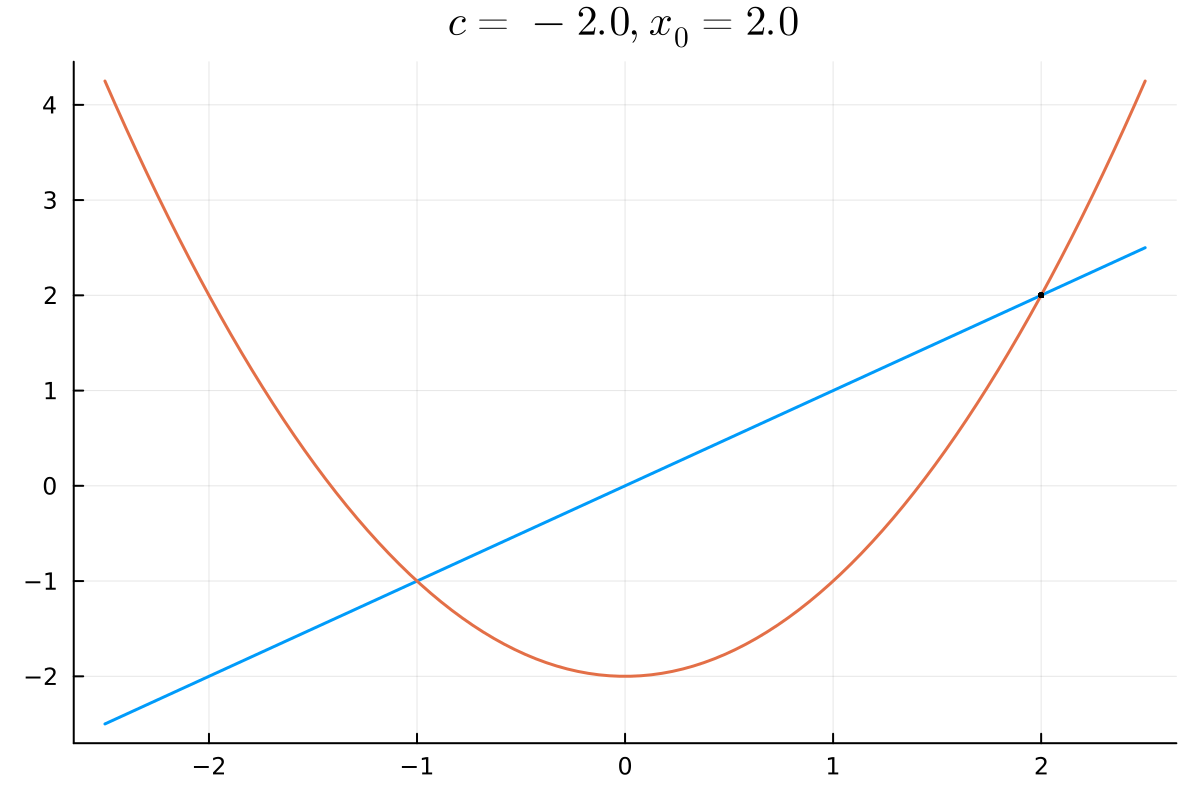

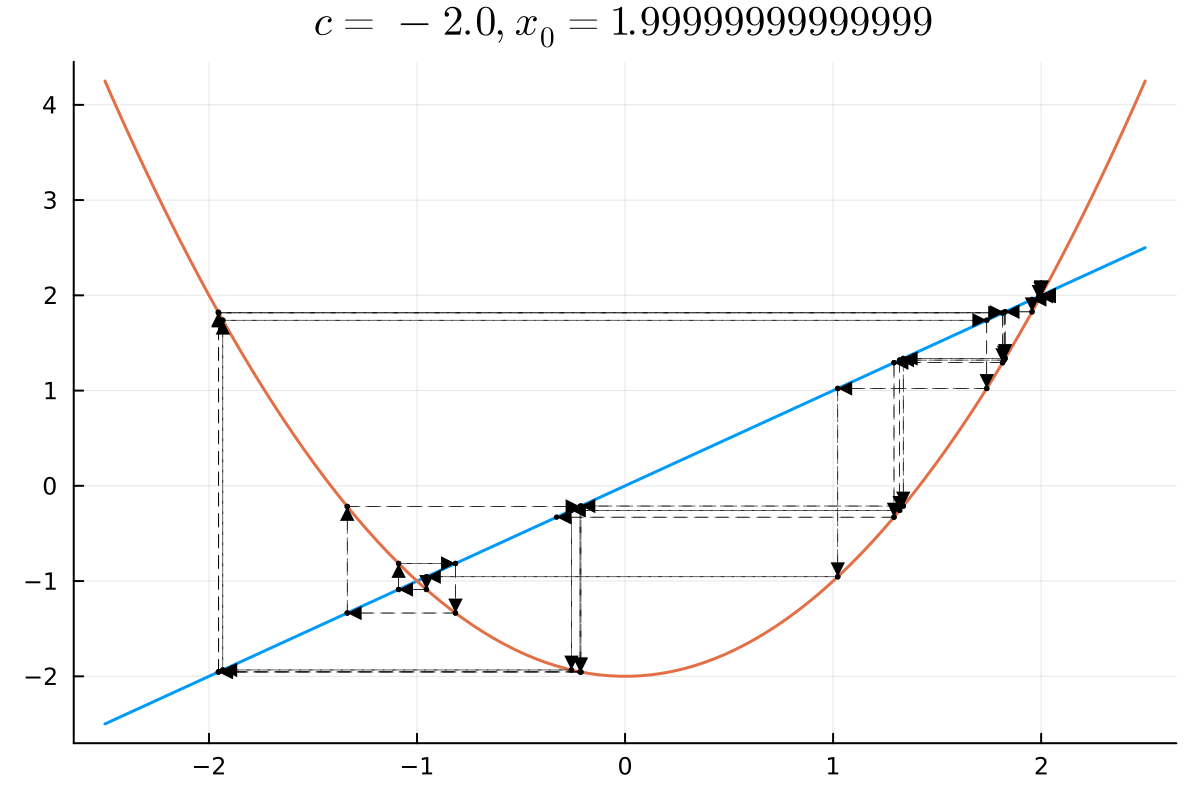

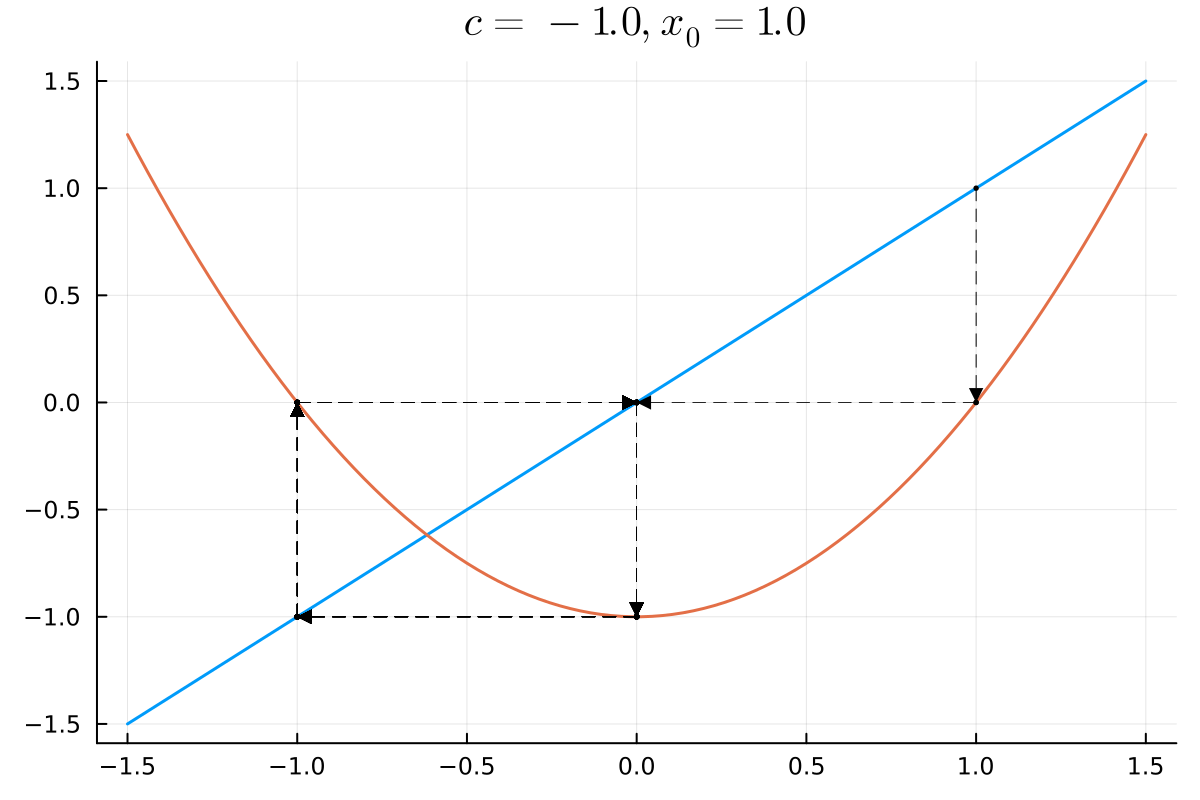

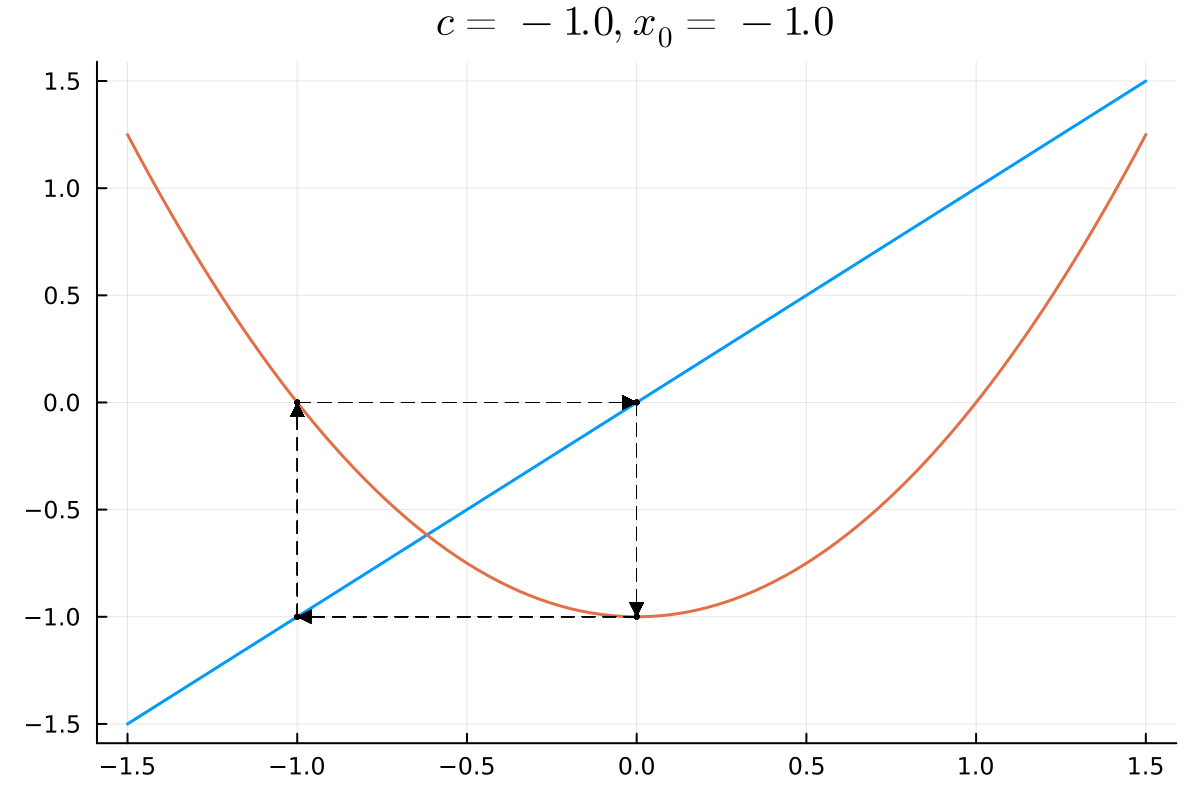

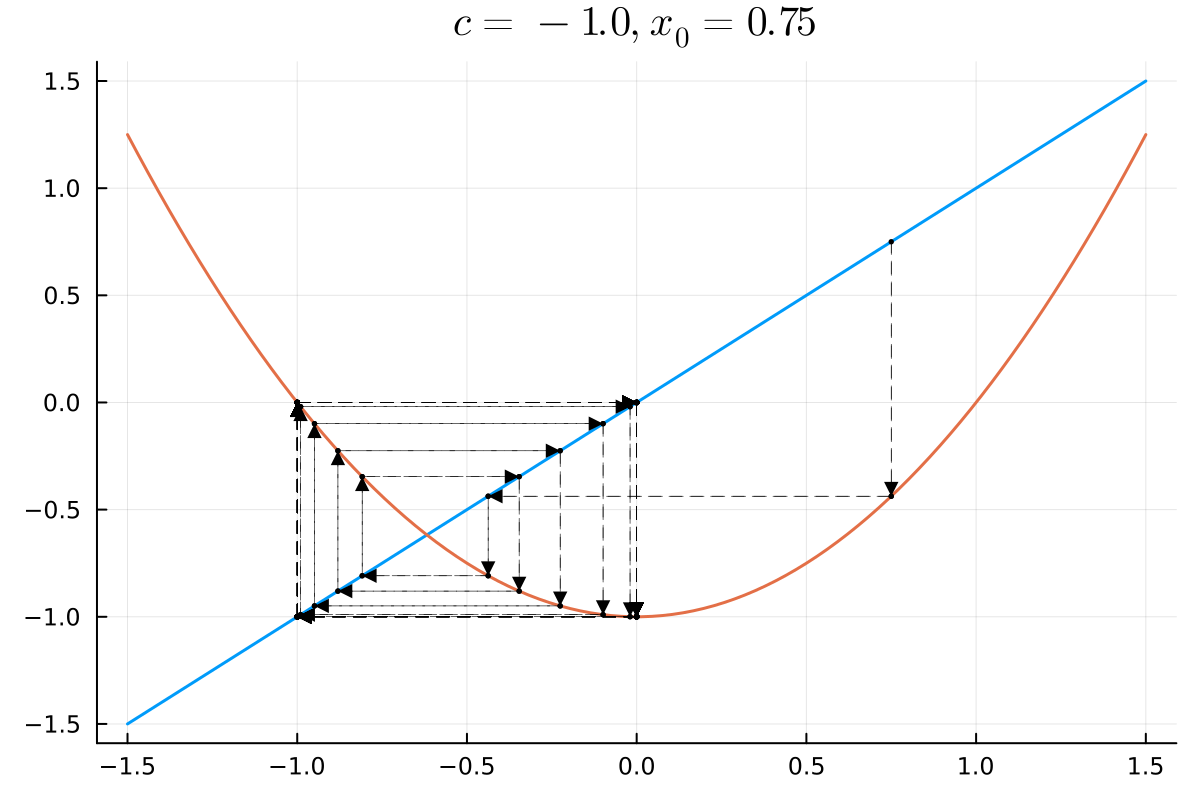

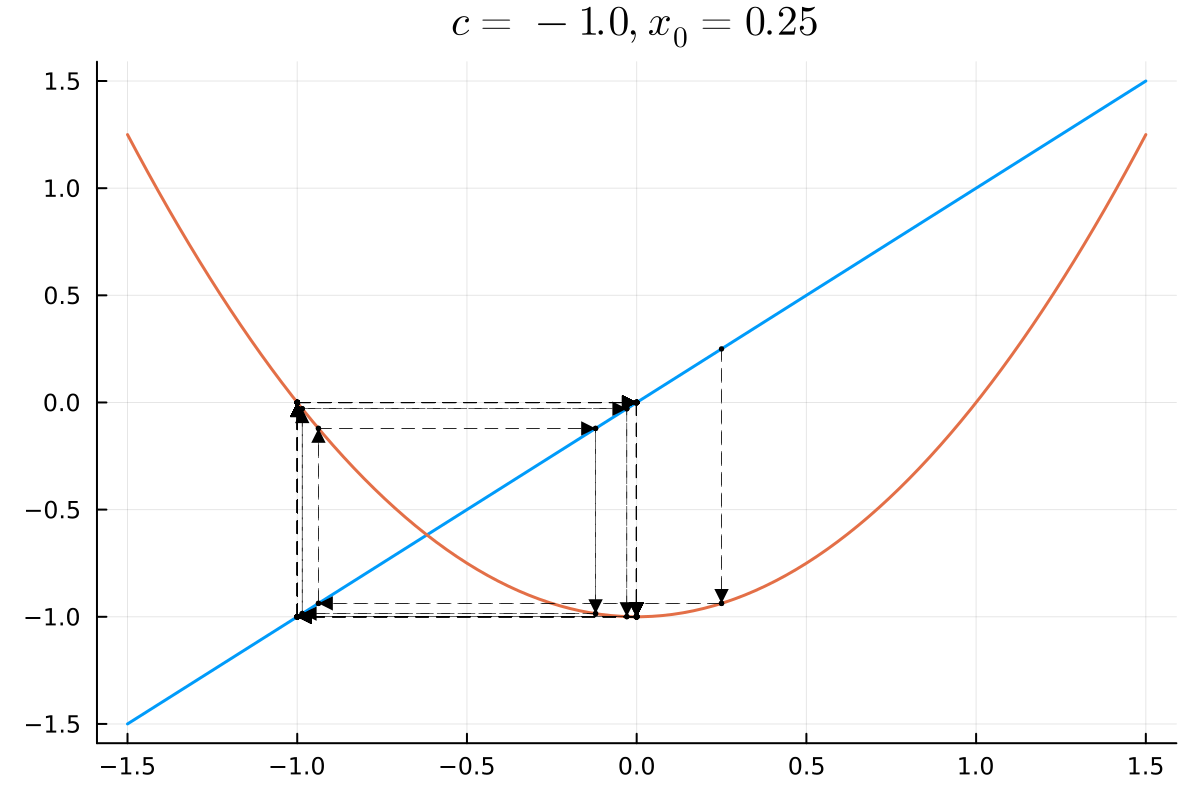

In [478]:
data = [[-2,1],[-2,2],[-2,1.99999999999999],[-1,1],[-1,-1],[-1,0.75],[-1,0.25]]

for (c, x_0) in data[1:3]
    plot_iterative(c, x_0, -2.5, 2.5)
end

for (c, x_0) in data[4:end]
    plot_iterative(c, x_0, -1.5, 1.5)
end


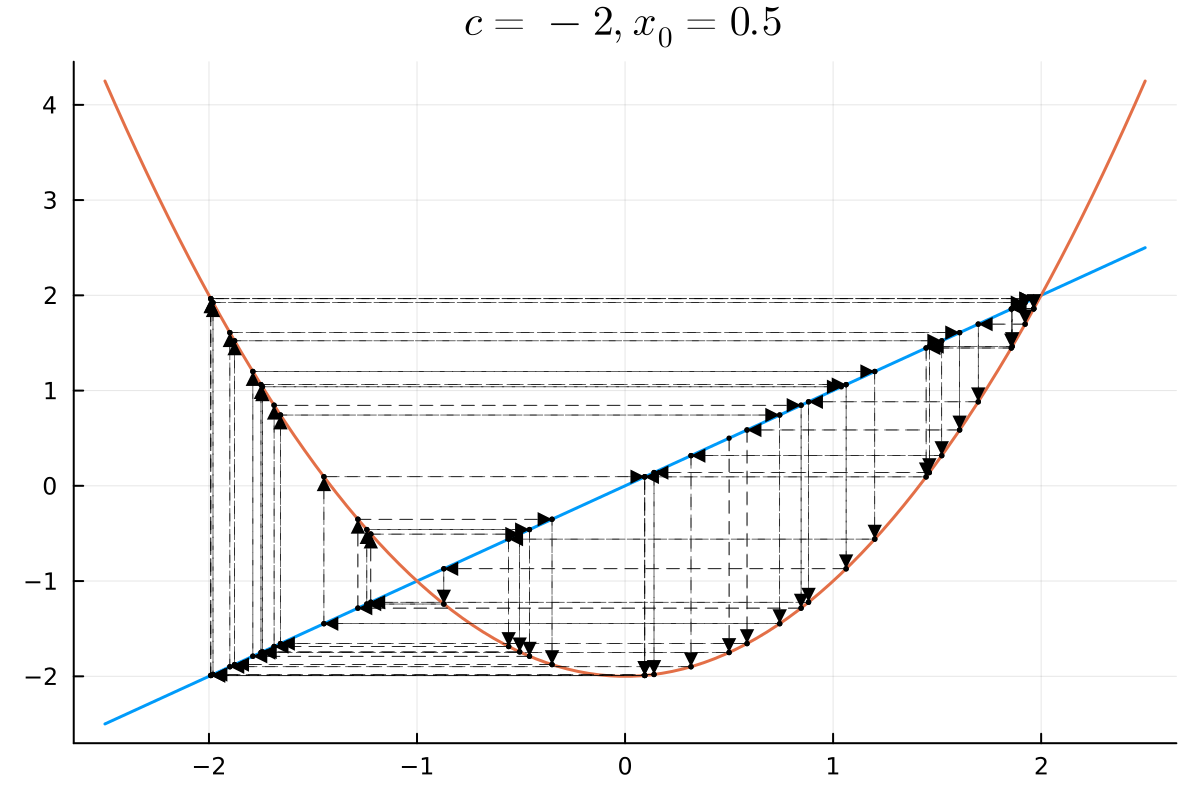

"/home/dawiderter/Projects/Studies/scientific_computing/lista_2/plots/-2_0.5.png"

In [483]:
plot_iterative(-2, 0.5, -2.5, 2.5)